In [39]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This is for custom colormap
# https://matplotlib.org/tutorials/colors/colorbar_only.html
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn import tree


In [40]:
# Dont worry about why I choose it
my_random_state = 13

In [41]:
from sklearn.datasets import load_iris
data = load_iris()

# df = pd.DataFrame(data.data, columns=data.feature_names)

df_org = pd.read_csv('penguins_size.csv')

# To simplify the decision tree, 
# I am restricting it to only one feature
df = df_org.loc[:, ('culmen_depth_mm', 'gender')]
df.dropna()


,culmen_depth_mm,gender
0,18.7,MALE
1,17.4,FEMALE
2,18.0,FEMALE
4,19.3,FEMALE
5,20.6,MALE
...,...,...
338,13.7,FEMALE
340,14.3,FEMALE
341,15.7,MALE
342,14.8,FEMALE


In [42]:
df.head(2)

,culmen_depth_mm,gender
0,18.7,MALE
1,17.4,FEMALE


In [43]:
df.dropna()

,culmen_depth_mm,gender
0,18.7,MALE
1,17.4,FEMALE
2,18.0,FEMALE
4,19.3,FEMALE
5,20.6,MALE
...,...,...
338,13.7,FEMALE
340,14.3,FEMALE
341,15.7,MALE
342,14.8,FEMALE


In [49]:
df.isnull().sum().sum()

12

In [77]:
df = df.dropna()
df = df[df["gender"] != '.']

In [78]:
df.isnull().sum().sum()

0

In [104]:
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(df['culmen_depth_mm'],df['gender'],test_size = 0.3, random_state = 100)

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
clf = DecisionTreeClassifier(max_depth=2,
                             random_state=my_random_state)

In [107]:
clf.fit(X_train.values.reshape(-1, 1), y_train )

DecisionTreeClassifier(max_depth=2, random_state=13)

In [108]:
X_test.iloc[0]

16.7

In [109]:
X_test.iloc[0:1].values

array([16.7])

In [110]:
# Predict for 1 observation 
clf.predict(X_test.values.reshape(-1, 1)[0:1])

array(['FEMALE'], dtype=object)

In [111]:
clf.predict(X_test.values.reshape(-1, 1)[0:10])

array(['FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'FEMALE'], dtype=object)

In [112]:
tree.export_graphviz(clf,
                     out_file="depth2_decisionTree.dot",
                     feature_names=['culmen_depth_mm'],
                     class_names=df['gender'], 
                     filled = False)

In [120]:
!dot -Tpng -Gdpi=300 depth2_decisionTree.dot -o depth2_decisionTree.png

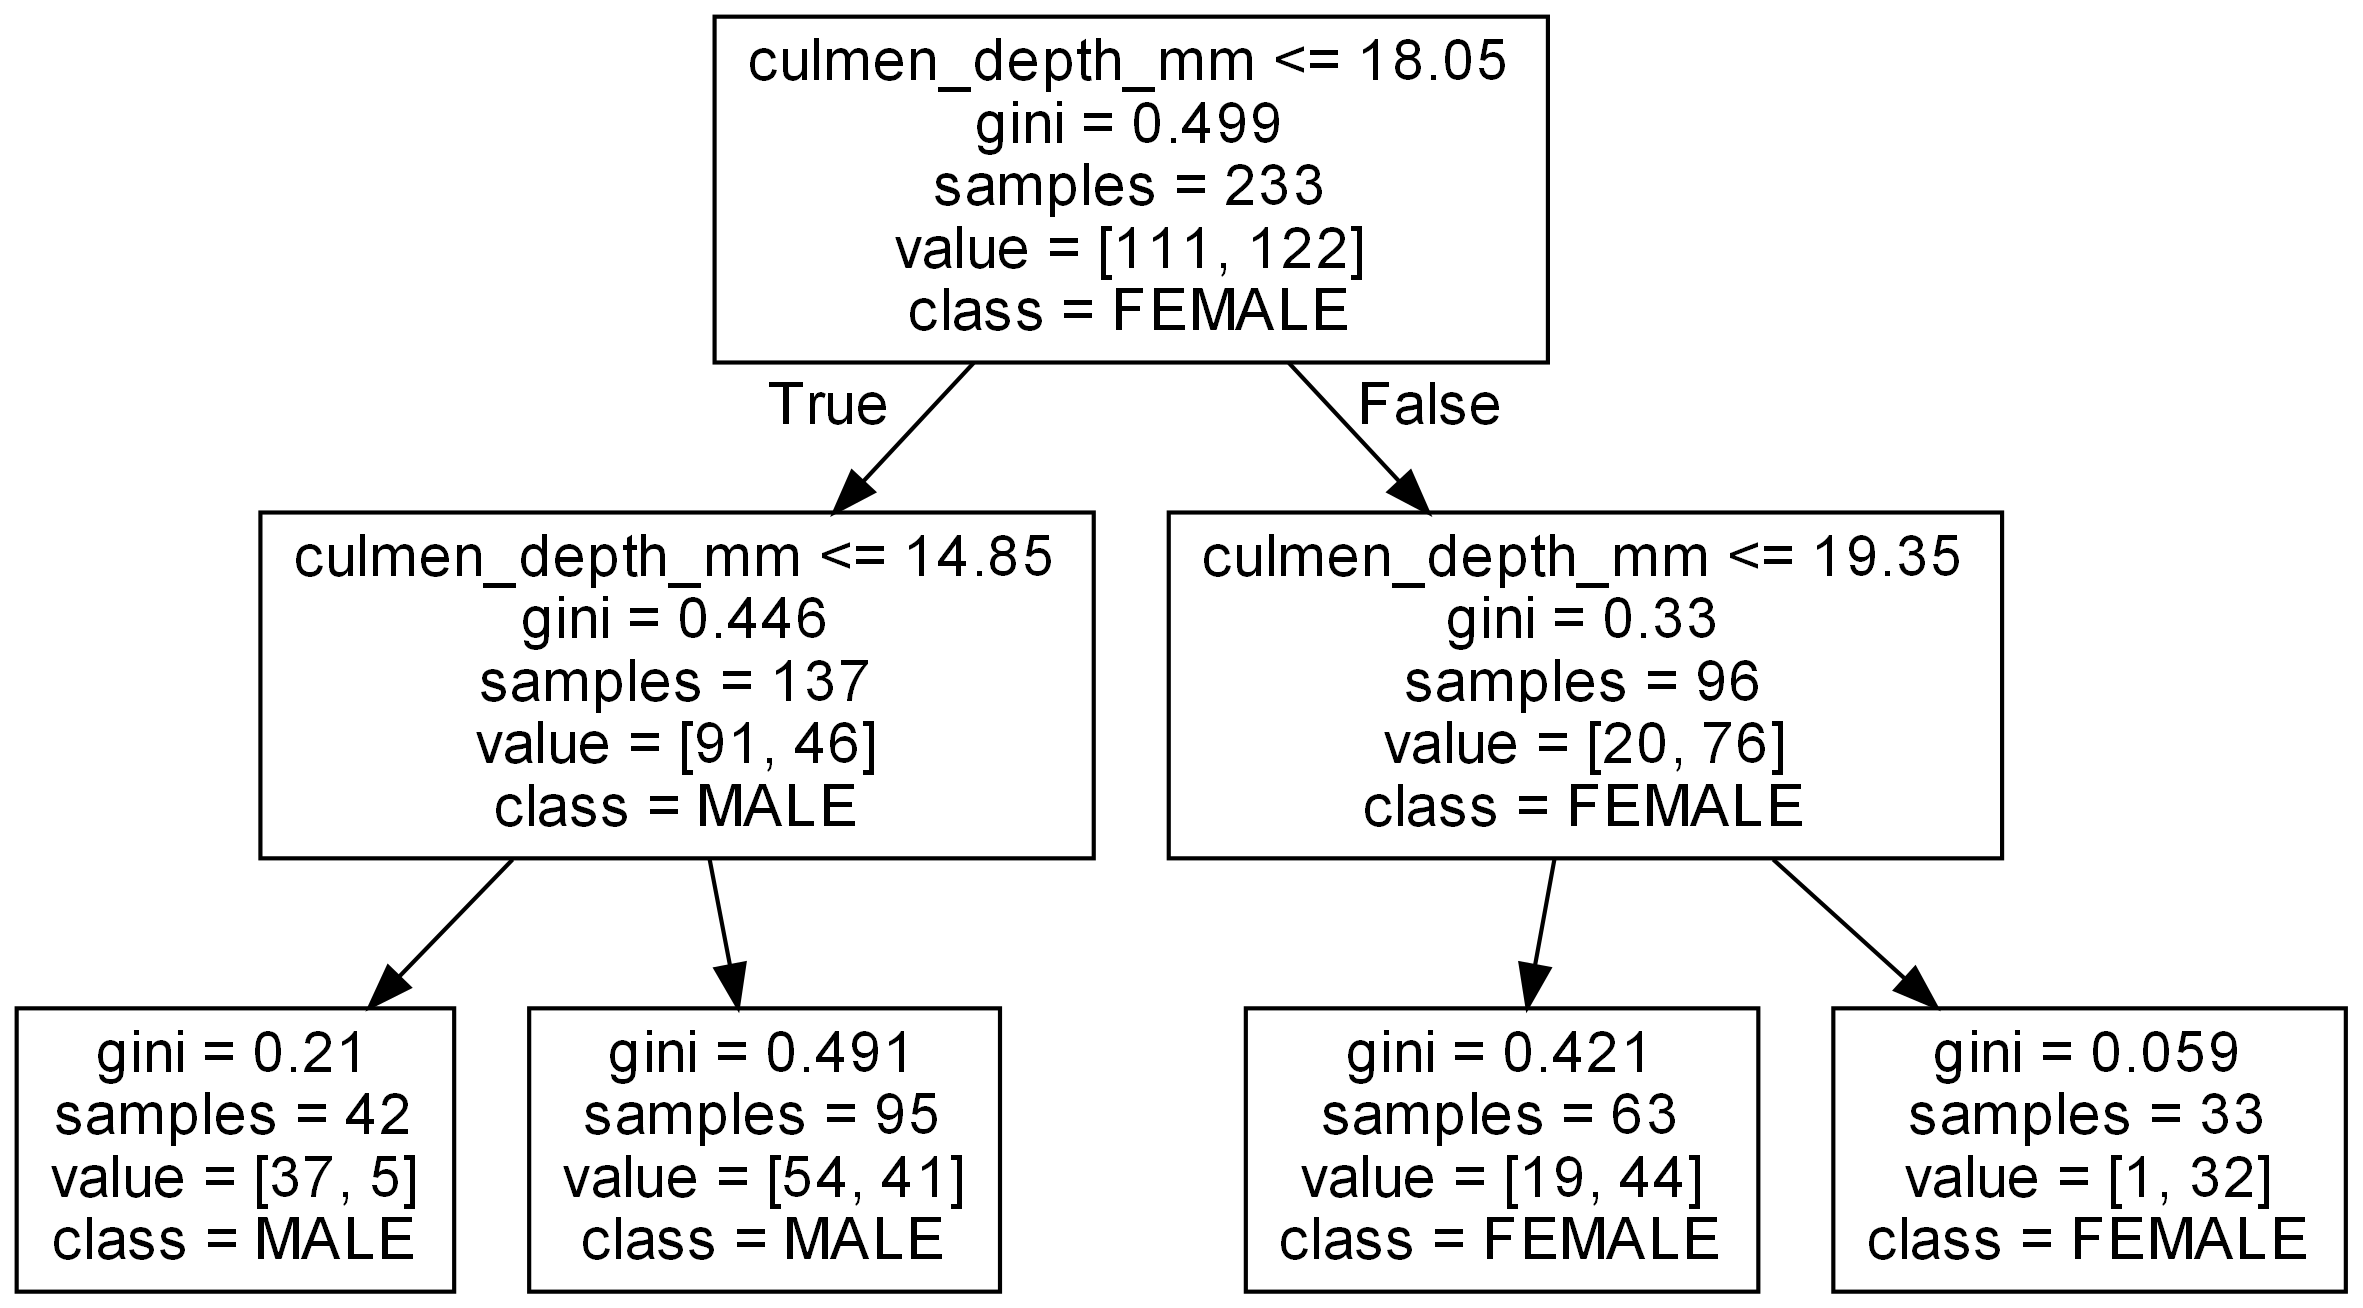

In [122]:
from IPython.display import Image
Image(filename ="depth2_decisionTree.png")